In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns

In [3]:
def get_excel_columns(n_cols):
    col_list = []
    n = n_cols
    alpha_list = [chr(c) for c in range(ord('A'), ord('Z') + 1)]
    alpha_list.insert(0,'dummy')
    for i in range(1,n+1):
        col_i = ""
        index_list=[]
        p=[]
        while i>26:
            k = i%26
            i = i//26
            if k==0:
                index_list.append(26)
                i = i-1
            else:
                index_list.append(k)
        index_list.append(int(i))
        index_list.reverse()
        for i in index_list:
            p.append(alpha_list[i])
            col_i = "".join(p)
        col_list.append(col_i)
    return col_list

In [4]:
df = pd.read_csv("winconsin_breast_data.csv", header = None)
df.columns = get_excel_columns(len(df.columns))
df.head()

,A,B,C,D,E,F,G,H,I,J,...,V,W,X,Y,Z,AA,AB,AC,AD,AE
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,o
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,o
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,o
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,o
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,o


# novelty = True

In [9]:
X = df[get_excel_columns(len(df.columns)-1)].values
X = StandardScaler().fit(X).transform(X.astype(float))
X[10:15]

array([[ 0.66134193, -0.89619949,  0.66096853,  0.59644823,  0.33764602,
        -0.03995185,  0.34399376,  1.02327623,  0.52031919, -0.76611318,
        -0.17249861, -0.73012895,  0.00627697,  0.10146159,  0.4175362 ,
        -0.43791873, -0.07857674,  0.55195625, -0.11866073, -0.47258714,
         0.67183605, -0.7817602 ,  0.71827278,  0.61738922,  0.85806658,
        -0.12480509,  0.40331312,  1.21604384,  0.49071625, -0.48320187],
       [ 0.42532064, -0.55775258,  0.52060875,  0.30107492,  1.03249322,
         1.14434114, -0.08189494,  0.17718021,  0.84126872,  0.70409837,
        -0.84531806, -0.80026304, -0.76415422, -0.59140371, -1.02172627,
        -0.17539033, -0.28955014, -0.61440337, -0.53624082, -0.43000158,
         0.40861646, -0.55937488,  0.49227604,  0.24392784,  0.24876766,
         0.75162817,  0.08223227, -0.12483265,  0.91039971,  0.08115302],
       [-1.4094883 , -1.3775462 , -1.41911741, -1.26893308,  0.66753743,
        -0.46407953, -0.40943912, -0.34637651,  0

In [7]:
df_inliers = df.loc[df.iloc[:,-1] == 'n']
X_inliers = df_inliers.iloc[:,0:-1].values.astype(float)
X_inliers = StandardScaler().fit(X_inliers).transform(X_inliers.astype(float))
X_inliers[0:5]

array([[ 0.78372526, -0.89102379,  0.79591911,  0.77189147,  0.39564021,
         0.03576508,  0.47445318,  1.39065367,  0.57783026, -0.77285292,
        -0.12616423, -0.73387814,  0.07489882,  0.27458162,  0.41425571,
        -0.41878967, -0.06469728,  0.57754159, -0.11215296, -0.45535287,
         0.87446028, -0.77558743,  0.93973479,  0.93223098,  0.95271996,
        -0.05836505,  0.51909648,  1.52055691,  0.65858779, -0.49707819],
       [ 0.52500995, -0.55263766,  0.64071453,  0.42662393,  1.11879744,
         1.39203815, -0.0087047 ,  0.33881598,  0.90884928,  0.77807861,
        -0.8796436 , -0.80339411, -0.80162395, -0.73209055, -1.0139324 ,
        -0.15054857, -0.27429752, -0.59075161, -0.54427725, -0.41275038,
         0.56616001, -0.55139076,  0.67248836,  0.43826668,  0.31225291,
         1.03125085,  0.16238934, -0.04516002,  1.1551543 ,  0.17323028],
       [-1.48622034, -1.37228406, -1.50416192, -1.40858861,  0.73897233,
        -0.44995336, -0.38029368, -0.31205186,  0

In [10]:
y = df.iloc[:,-1]
y_array = y.to_numpy().astype(str)
y_array = np.where(y_array == 'o', -1, 1)
y_array

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

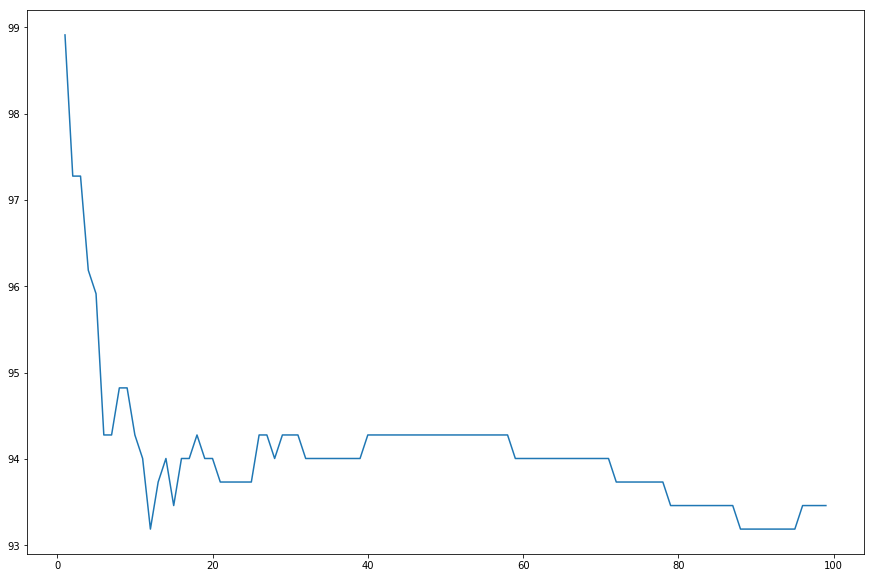

In [21]:
plt.figure(figsize = (15,10))
accuracy_list = []

for i in range(1,100):
    lof = LocalOutlierFactor(n_neighbors = i, contamination = 0.09, novelty = True)
    lof.fit(X_inliers)
    y_hat = lof.predict(X)
    accuracy_list.append((len(y_hat)-np.count_nonzero(y_hat != y_array))/len(y_hat)*100)

plt.plot(range(1,100), accuracy_list)
    

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (256, 30) (256,)
Test Set:  (111, 30) (111,)


In [27]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 'auto', novelty = True)

In [28]:
clf.fit(X_test)

LocalOutlierFactor(novelty=True)

In [29]:
y_pred = clf.predict(X)

In [30]:
metrics.accuracy_score(y_array, y_pred)

0.9482288828337875

In [35]:
r_probs = [0 for _ in range(len(y_array))]
clf.score(X_test)

AttributeError: 'LocalOutlierFactor' object has no attribute 'score'